# Machine learning case study: regression

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #to disable future warning

 


In [13]:
df = pd.read_csv('C:/1MyData/Professionals&workshop/2024_Workshop-with-Korea/Topic1_ML Data Science/Student_Performance.csv')   

X = df.iloc[: , :2]
Y = df.iloc[:, -1]

In [16]:
X.shape

(10000, 2)

In [18]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,
random_state=1)

In [24]:
# create linear regression object, a simplest form of Machine Learning
reg_RF =  RandomForestRegressor(n_estimators = 100, random_state = 0)
reg_LGBM = lgb.LGBMRegressor(n_estimators=100)


In [25]:
# train the model using the training sets
reg_RF.fit(X_train, y_train)
reg_LGBM.fit(X_train, y_train)

# # Coeef of determination (R-Square): 1 means perfect prediction
# from sklearn.metrics import r2_score
# print('R-square score (train):', r2_score(reg.predict(X_train), y_train))

# # plot for residual error
# ## setting plot style
# plt.style.use('fivethirtyeight')
# ## plotting residual errors in training data
# plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,color = "red", s = 10, label = 'Train data')
# plt.legend(loc = 'upper right')
# ## plot title
# plt.title("Residual errors")
# ## method call for showing the plot
# plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 2
[LightGBM] [Info] Start training from score 55.164000


LGBMRegressor()

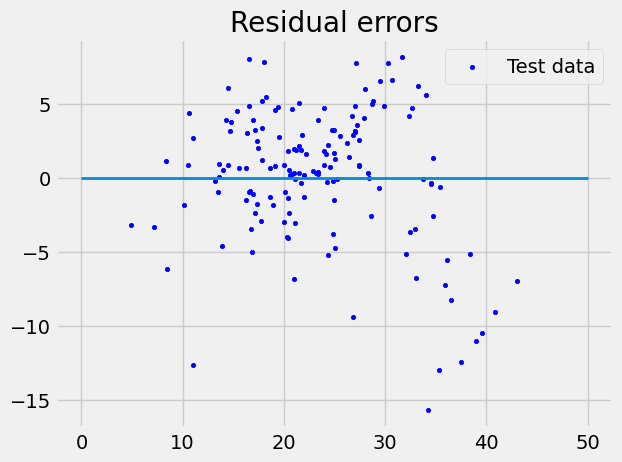

In [7]:
# ## plotting residual errors in test data
# plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
# ## plotting line for zero residual error
# plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
# ## plotting legend
# plt.legend(loc = 'upper right')
# ## plot title
# plt.title("Residual errors")
# ## method call for showing the plot
# plt.show()

In [30]:
# #regression plot: actual vs predicted
# import seaborn as sns

# #create scatterplot with regression line
# p=sns.regplot(x=y_test, y=reg.predict(X_test))
# p.axes.set_title("Regression plot",fontsize=15)
# p.set_xlabel("Actual price (K)",fontsize=10)
# p.set_ylabel("Predicted price (K)",fontsize=10)
# plt.show()

#R-square for test data
# print('R-square score (test):',  r2_score(reg_RF.predict(X_test), y_test))
print('R-square score RF (test): {:.2f}'.format (r2_score(reg_RF.predict(X_test), y_test)))
print('R-square score LBGM (test): {:.2f}'.format (r2_score(reg_LGBM.predict(X_test), y_test)))

R-square score RF (test): 0.98
R-square score LBGM (test): 0.98


In [32]:
import pickle
pickle_out = open("reg_RF.pkl","wb")
pickle.dump(reg_RF, pickle_out)
pickle_out.close()

In [33]:
pickle_out = open("reg_LGBM.pkl","wb")
pickle.dump(reg_LGBM, pickle_out)
pickle_out.close()